In [92]:
# Importar las librerías necesarias 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [93]:
# Abrir con una url
url = "https://raw.githubusercontent.com/chrisrueda/EndomorfismoII_2024/main/PROYECTOS/SEGUNDO%20PARCIAL/mora_cdto.csv"
# Cargar nuestros dataframe
data = pd.read_csv(url)

# Contar las columnas numéricas y categóricas
columnas_numericas = len(data.select_dtypes(include=['number']).columns)
columnas_categoricas = len(data.select_dtypes(include=['object']).columns)

# Mostrar los resultados
print("Número de columnas numéricas:", columnas_numericas)
print("Número de columnas categóricas:", columnas_categoricas)

#data.head(10)
data.tail(10)

Número de columnas numéricas: 22
Número de columnas categóricas: 3


,ID,CU,G,ED,EC,E,M1,M2,M3,M4,...,D4,D5,D6,P1,P2,P3,P4,P5,P6,SP
29990,29991,14000,M,2,Casado,41,0,0,0,0,...,13826.2,4967.5,4612.1,600.0,700.0,422.8,150.5,200.0,200.0,No
29991,29992,21000,M,2,Casado,34,3,2,2,2,...,250.0,250.0,250.0,0.0,0.0,0.0,0.0,0.0,0.0,Si
29992,29993,1000,M,3,Casado,43,0,0,0,-2,...,0.0,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,No
29993,29994,10000,M,1,Soltero,38,0,-1,-1,0,...,7062.6,6947.3,5500.4,200.0,11178.4,400.0,300.0,200.0,200.0,No
29994,29995,8000,M,2,Soltero,34,2,2,2,2,...,7751.9,8260.7,8115.8,700.0,350.0,0.0,700.0,0.0,400.0,Si
29995,29996,22000,M,3,Casado,39,0,0,0,0,...,8800.4,3123.7,1598.0,850.0,2000.0,500.3,304.7,500.0,100.0,No
29996,29997,15000,M,3,Soltero,43,-1,-1,-1,-1,...,897.9,519.0,0.0,183.7,352.6,899.8,12.9,0.0,0.0,No
29997,29998,3000,M,2,Soltero,37,4,3,2,-1,...,2087.8,2058.2,1935.7,0.0,0.0,2200.0,420.0,200.0,310.0,Si
29998,29999,8000,M,3,Casado,41,1,-1,0,0,...,5277.4,1185.5,4894.4,8590.0,340.9,117.8,192.6,5296.4,180.4,Si
29999,30000,5000,M,2,Casado,46,0,0,0,0,...,3653.5,3242.8,1531.3,207.8,180.0,143.0,100.0,100.0,100.0,Si


# Analisis estadistico simple

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      30000 non-null  int64  
 1   CU      30000 non-null  int64  
 2   G       29997 non-null  object 
 3   ED      30000 non-null  int64  
 4   EC      29999 non-null  object 
 5   E       30000 non-null  int64  
 6   M1      30000 non-null  int64  
 7   M2      30000 non-null  int64  
 8   M3      30000 non-null  int64  
 9   M4      30000 non-null  int64  
 10  M5      30000 non-null  int64  
 11  M6      30000 non-null  int64  
 12  D1      30000 non-null  float64
 13  D2      30000 non-null  float64
 14  D3      30000 non-null  float64
 15  D4      30000 non-null  float64
 16  D5      30000 non-null  float64
 17  D6      30000 non-null  float64
 18  P1      30000 non-null  float64
 19  P2      30000 non-null  float64
 20  P3      30000 non-null  float64
 21  P4      30000 non-null  float64
 22

In [95]:
data.describe()

,ID,CU,ED,E,M1,M2,M3,M4,M5,M6,...,D3,D4,D5,D6,P1,P2,P3,P4,P5,P6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,16748.432267,1.853133,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,...,4701.315480,4326.294897,4031.140097,3887.176040,566.358050,592.11635,522.568150,482.607687,479.938763,521.550257
std,8660.398374,12974.766157,0.790349,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,...,6934.938743,6433.285613,6079.715577,5955.410754,1656.328035,2304.08704,1760.696147,1566.615974,1527.830568,1777.746578
min,1.000000,1000.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-15726.400000,-17000.000000,-8133.400000,-33960.300000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,5000.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,266.625000,232.675000,176.300000,125.600000,100.000000,83.30000,39.000000,29.600000,25.250000,11.775000
50%,15000.500000,14000.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2008.850000,1905.200000,1810.450000,1707.100000,210.000000,200.90000,180.000000,150.000000,150.000000,150.000000
75%,22500.250000,24000.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6016.475000,5450.600000,5019.050000,4919.825000,500.600000,500.00000,450.500000,401.325000,403.150000,400.000000
max,30000.000000,100000.000000,6.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,166408.900000,89158.600000,92717.100000,96166.400000,87355.200000,168425.90000,89604.000000,62100.000000,42652.900000,52866.600000


In [96]:
# Obtener todas las columnas que son de tipo float64
float_columns = data.select_dtypes(include=['float64']).columns

# Convertir las columnas de float64 a enteros
data[float_columns] = data[float_columns].astype(int)
print(float_columns)

Index(['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6'], dtype='object')


# Analizar el balance de los datos

In [97]:
# Caso ideal ->50%(Positivo - 1) -50%(Negativo - 0)
data["SP"].unique() # Clase existente
print("Balance: ")
data["SP"].value_counts()

Balance: 


SP
No    23364
Si     6636
Name: count, dtype: int64

In [98]:
# Verificar si las claves están presentes antes de acceder a ellas
proporcion_si = data.get('Si', 1) / len(data)
proporcion_no = data.get('No', 0) / len(data)

# Mostrar la proporción de cada clase
print("Proporción de 'Si':", proporcion_si)
print("Proporción de 'No':", proporcion_no)

Proporción de 'Si': 3.3333333333333335e-05
Proporción de 'No': 0.0


## Datos nan o faltantes "?"

In [99]:
datos_faltantes = data.isnull()

for i in datos_faltantes.columns.values.tolist():
    print(datos_faltantes[i].value_counts())# Datos Anomalos o Cero
    

ID
False    30000
Name: count, dtype: int64
CU
False    30000
Name: count, dtype: int64
G
False    29997
True         3
Name: count, dtype: int64
ED
False    30000
Name: count, dtype: int64
EC
False    29999
True         1
Name: count, dtype: int64
E
False    30000
Name: count, dtype: int64
M1
False    30000
Name: count, dtype: int64
M2
False    30000
Name: count, dtype: int64
M3
False    30000
Name: count, dtype: int64
M4
False    30000
Name: count, dtype: int64
M5
False    30000
Name: count, dtype: int64
M6
False    30000
Name: count, dtype: int64
D1
False    30000
Name: count, dtype: int64
D2
False    30000
Name: count, dtype: int64
D3
False    30000
Name: count, dtype: int64
D4
False    30000
Name: count, dtype: int64
D5
False    30000
Name: count, dtype: int64
D6
False    30000
Name: count, dtype: int64
P1
False    30000
Name: count, dtype: int64
P2
False    30000
Name: count, dtype: int64
P3
False    30000
Name: count, dtype: int64
P4
False    30000
Name: count, dtype: int64
P5
F

# Datos Anomalos o Cero

In [100]:
# Calcular estadísticas resumidas para identificar valores anómalos
summary_stats = data.describe()

# Encontrar valores anómalos (por ejemplo, valores extremadamente altos o bajos)
outliers = summary_stats.loc[['min', '25%', '75%', 'max']]

# Encontrar valores que sean iguales a cero
zeros = (data == 0).sum()

# Mostrar los resultados
print("Valores anómalos:")
print(outliers)
print("\nValores iguales a cero:")
print(zeros)

Valores anómalos:
           ID        CU   ED     E   M1   M2   M3   M4   M5   M6  ...  \
min      1.00    1000.0  0.0  21.0 -2.0 -2.0 -2.0 -2.0 -2.0 -2.0  ...   
25%   7500.75    5000.0  1.0  28.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  ...   
75%  22500.25   24000.0  2.0  41.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
max  30000.00  100000.0  6.0  79.0  8.0  8.0  8.0  8.0  8.0  8.0  ...   

           D3        D4       D5        D6       P1        P2       P3  \
min  -15726.0 -17000.00  -8133.0 -33960.00      0.0       0.0      0.0   
25%     266.0    232.00    176.0    125.00    100.0      83.0     39.0   
75%    6016.0   5450.25   5018.5   4919.25    500.0     500.0    450.0   
max  166408.0  89158.00  92717.0  96166.00  87355.0  168425.0  89604.0   

          P4       P5       P6  
min      0.0      0.0      0.0  
25%     29.0     25.0     11.0  
75%    401.0    403.0    400.0  
max  62100.0  42652.0  52866.0  

[4 rows x 22 columns]

Valores iguales a cero:
ID        0
CU        0
G       

# Imputacion con la media y mediana

In [101]:
data_mod = data.copy()
data_mod.head(10)

,ID,CU,G,ED,EC,E,M1,M2,M3,M4,...,D4,D5,D6,P1,P2,P3,P4,P5,P6,SP
0,1,2000,F,2,Casado,24,2,2,-1,-1,...,0,0,0,0,68,0,0,0,0,Si
1,2,12000,F,2,Soltero,26,-1,2,0,0,...,327,345,326,0,100,100,100,0,200,Si
2,3,9000,F,2,Soltero,34,0,0,0,0,...,1433,1494,1554,151,150,100,100,100,500,No
3,4,5000,F,2,Casado,37,0,0,0,0,...,2831,2895,2954,200,201,120,110,106,100,No
4,5,5000,M,2,Casado,57,-1,0,-1,0,...,2094,1914,1913,200,3668,1000,900,68,67,No
5,6,5000,M,1,Soltero,37,0,0,0,0,...,1939,1961,2002,250,181,65,100,100,80,No
6,7,50000,M,1,Soltero,29,0,0,0,0,...,54265,48300,47394,5500,4000,3800,2023,1375,1377,No
7,8,10000,F,2,Soltero,23,0,-1,-1,0,...,22,-15,56,38,60,0,58,168,154,No
8,9,14000,F,3,Casado,28,0,0,2,0,...,1221,1179,371,332,0,43,100,100,100,No
9,10,2000,M,3,Soltero,35,-2,-2,-2,-2,...,0,1300,1391,0,0,0,1300,112,0,No


In [102]:
# Convertir columnas a tipos numéricos
#data_numerico = data_mod.apply(pd.to_numeric, errors='coerce')

# Convertir datos categóricos en numéricos utilizando codificación one-hot
data_numerico = pd.get_dummies(data_mod)

# Convertir todos los datos negativos a positivos
data_positivo = data_numerico.abs()
print(data_positivo)

# Mostrar los primeros registros del nuevo DataFrame con datos numéricos
print(data_numerico.head())

          ID     CU  ED   E  M1  M2  M3  M4  M5  M6  ...   P6    G_F    G_M  \
0          1   2000   2  24   2   2   1   1   2   2  ...    0   True  False   
1          2  12000   2  26   1   2   0   0   0   2  ...  200   True  False   
2          3   9000   2  34   0   0   0   0   0   0  ...  500   True  False   
3          4   5000   2  37   0   0   0   0   0   0  ...  100   True  False   
4          5   5000   2  57   1   0   1   0   0   0  ...   67  False   True   
...      ...    ...  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...    ...    ...   
29995  29996  22000   3  39   0   0   0   0   0   0  ...  100  False   True   
29996  29997  15000   3  43   1   1   1   1   0   0  ...    0  False   True   
29997  29998   3000   2  37   4   3   2   1   0   0  ...  310  False   True   
29998  29999   8000   3  41   1   1   0   0   0   1  ...  180  False   True   
29999  30000   5000   2  46   0   0   0   0   0   0  ...  100  False   True   

         G_O   EC_0  EC_Casado  EC_Otros  EC_Solter

In [103]:
#Categorico
mas_freq = data_mod["G"].value_counts().idxmax()
print(f"La variable mas frecuente para G es {mas_freq}")
#imputar la variable
data_mod["G"].replace(np.nan,mas_freq,inplace=True)
#Comprobar faltantes
data_mod["G"].count()

La variable mas frecuente para G es F


C:\Users\SRA DAYA\AppData\Local\Temp\ipykernel_21020\1487944151.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_mod["G"].replace(np.nan,mas_freq,inplace=True)


30000

In [104]:
#Categorico
mas_freq = data_mod["EC"].value_counts().idxmax()
print(f"La variable mas frecuente para EC es {mas_freq}")
#imputar la variable
data_mod["EC"].replace(np.nan,mas_freq,inplace=True)
#Comprobar faltantes
data_mod["EC"].count()

La variable mas frecuente para EC es Soltero


C:\Users\SRA DAYA\AppData\Local\Temp\ipykernel_21020\2859631229.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_mod["EC"].replace(np.nan,mas_freq,inplace=True)


30000

In [105]:
#Categorico
mas_freq = data_mod["SP"].value_counts().idxmax()
print(f"La variable mas frecuente para SP es {mas_freq}")
#imputar la variable
data_mod["SP"].replace(np.nan,mas_freq,inplace=True)
#Comprobar faltantes
data_mod["SP"].count()

La variable mas frecuente para SP es No


C:\Users\SRA DAYA\AppData\Local\Temp\ipykernel_21020\2256161596.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_mod["SP"].replace(np.nan,mas_freq,inplace=True)


30000

# Datos Anomalos o Cero

In [106]:
# Verificar qué datos son iguales a cero
zeros_mask = data == 0

# Mostrar los resultados
print("Valores iguales a cero:")
print(zeros_mask)

Valores iguales a cero:
          ID     CU      G     ED     EC      E     M1     M2     M3     M4  \
0      False  False  False  False  False  False  False  False  False  False   
1      False  False  False  False  False  False  False  False   True   True   
2      False  False  False  False  False  False   True   True   True   True   
3      False  False  False  False  False  False   True   True   True   True   
4      False  False  False  False  False  False  False   True  False   True   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
29995  False  False  False  False  False  False   True   True   True   True   
29996  False  False  False  False  False  False  False  False  False  False   
29997  False  False  False  False  False  False  False  False  False  False   
29998  False  False  False  False  False  False  False  False   True   True   
29999  False  False  False  False  False  False   True   True   True   True   

       ...     D4     D5   

In [107]:
# Convertir todas las categorías a valores numéricos (1 o 0)
data_numerico = data_positivo.replace({'True': 0, 'False': 1})

# Mostrar el nuevo DataFrame con valores numéricos
print(data_numerico)

          ID     CU  ED   E  M1  M2  M3  M4  M5  M6  ...   P6    G_F    G_M  \
0          1   2000   2  24   2   2   1   1   2   2  ...    0   True  False   
1          2  12000   2  26   1   2   0   0   0   2  ...  200   True  False   
2          3   9000   2  34   0   0   0   0   0   0  ...  500   True  False   
3          4   5000   2  37   0   0   0   0   0   0  ...  100   True  False   
4          5   5000   2  57   1   0   1   0   0   0  ...   67  False   True   
...      ...    ...  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...    ...    ...   
29995  29996  22000   3  39   0   0   0   0   0   0  ...  100  False   True   
29996  29997  15000   3  43   1   1   1   1   0   0  ...    0  False   True   
29997  29998   3000   2  37   4   3   2   1   0   0  ...  310  False   True   
29998  29999   8000   3  41   1   1   0   0   0   1  ...  180  False   True   
29999  30000   5000   2  46   0   0   0   0   0   0  ...  100  False   True   

         G_O   EC_0  EC_Casado  EC_Otros  EC_Solter

# Generacion de modelos (Luego de la imputacion)

In [119]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

import pandas as pd

# Cargar los datos
data = pd.read_csv('mora_cdto.csv')

# Verificar las columnas presentes en el DataFrame
print(data.columns)

# Convertir las variables categóricas en variables dummy
data = pd.get_dummies(data, columns=['G', 'EC'])

# Separar las características (X) y la variable objetivo (y)
X = data.drop("SP", axis=1)
y = data["SP"]

# Inicializar LabelEncoder
label_encoder = LabelEncoder()

# Convertir la variable objetivo a valores numéricos
y = label_encoder.fit_transform(y)

# Inicializar el modelo de Bosque Aleatorio
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Realizar la validación cruzada k-fold
k = 5  # Número de pliegues
scores = cross_val_score(modelo_rf, X, y, cv=k)

# Imprimir los puntajes de cada pliegue y el puntaje promedio
for i, score in enumerate(scores, 1):
    print(f'Puntuación del pliegue {i}: {score:.2f}')
print(f'Puntuación promedio: {scores.mean():.2f}')

Index(['ID', 'CU', 'G', 'ED', 'EC', 'E', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6',
       'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6',
       'SP'],
      dtype='object')
Puntuación del pliegue 1: 0.81
Puntuación del pliegue 2: 0.81
Puntuación del pliegue 3: 0.82
Puntuación del pliegue 4: 0.83
Puntuación del pliegue 5: 0.82
Puntuación promedio: 0.82


In [121]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Matriz de entrada
X = data.drop("SP", axis=1)
# Target - Vector de salida
y = data["SP"]

# Generar nuestro conjunto de entrenamiento y validacion 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
# Crear el modelo
modelo_rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
# Entrenar el modelo
modelo_rf.fit(X_train, y_train)
# Validar el modelo (prediccion)
y_pred = modelo_rf.predict(X_test)
# Exactitud
exactitud = accuracy_score(y_test, y_pred)
print(f'Exactitud: {exactitud:.2f}')


Exactitud: 0.82


In [122]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.83      0.96      0.89      4687
          Si       0.69      0.29      0.41      1313

    accuracy                           0.82      6000
   macro avg       0.76      0.63      0.65      6000
weighted avg       0.80      0.82      0.79      6000



In [123]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Convertir las etiquetas de clase en valores numéricos
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Crear y entrenar el modelo XGBoost
modelo_xgb = XGBClassifier()
modelo_xgb.fit(X_train, y_train_encoded)

# Realizar predicciones sobre los datos de prueba
y_pred_xgb = modelo_xgb.predict(X_test)

# Calcular la exactitud
exactitud_xgb = accuracy_score(y_test_encoded, y_pred_xgb)

# Imprimir la exactitud
print(f'Exactitud del modelo XGBoost: {exactitud_xgb:.2f}')

Exactitud del modelo XGBoost: 0.82


In [124]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.83      0.96      0.89      4687
          Si       0.69      0.29      0.41      1313

    accuracy                           0.82      6000
   macro avg       0.76      0.63      0.65      6000
weighted avg       0.80      0.82      0.79      6000



In [125]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Definir los parámetros a ajustar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7]
}
# Inicializar el modelo XGBoost
modelo_xgb = XGBClassifier(random_state=42)

In [126]:
# Realizar la búsqueda en cuadrícula para encontrar la mejor combinación de hiperparámetros
grid_search = GridSearchCV(estimator=modelo_xgb, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train_encoded)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, ...),
             param_grid={'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [127]:
# Obtener el mejor modelo
best_model = grid_search.best_estimator_

# Realizar predicciones con el mejor modelo
y_pred = best_model.predict(X_test)

# Calcular las métricas de evaluación
con_mat = confusion_matrix(y_test_encoded, y_pred)
exactitud = accuracy_score(y_test_encoded, y_pred)
precision = precision_score(y_test_encoded, y_pred, pos_label=1)
recall = recall_score(y_test_encoded, y_pred, pos_label=1)
f1 = f1_score(y_test_encoded, y_pred, pos_label=1)

# Calcular la especificidad
vn, fp, fn, vp = con_mat.ravel()
especificidad = vn / (vn + fp)

# Imprimir las métricas
print(f"Matriz de confusion:\n{con_mat}")
print(f"Exactitud: {exactitud:.2f}")
print(f"Precisión: {precision:.2f}")
print(f"Sensibilidad: {recall:.2f}")
print(f"Especificidad: {especificidad:.2f}")
print(f"f1-Score: {f1:.2f}")

Matriz de confusion:
[[4449  238]
 [ 835  478]]
Exactitud: 0.82
Precisión: 0.67
Sensibilidad: 0.36
Especificidad: 0.95
f1-Score: 0.47


# Metricas

In [138]:
#no correr porque los datos dan cero 
#y_pred_str = ['Si' if pred == 1 else 'No' for pred in y_pred]


In [146]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Convertir las predicciones enteras en etiquetas de cadena
y_pred_labels = np.where(y_pred == 0, 'No', 'Si')

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_labels)

# Mostrar la matriz de confusión
print(f"Matriz de confusión:\n{conf_matrix}")

# Calcular las métricas
exactitud = accuracy_score(y_test, y_pred_labels)
precision = precision_score(y_test, y_pred_labels, pos_label='Si')
sensibilidad = recall_score(y_test, y_pred_labels, pos_label='Si')
especificidad = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
f1 = f1_score(y_test, y_pred_labels, pos_label='Si')

# Mostrar las métricas
print(f"Exactitud: {exactitud:.2f}")
print(f"Precisión: {precision:.2f}")
print(f"Sensibilidad: {sensibilidad:.2f}")
print(f"Especificidad: {especificidad:.2f}")
print(f"F1-Score: {f1:.2f}")

Matriz de confusión:
[[4449  238]
 [ 835  478]]
Exactitud: 0.82
Precisión: 0.67
Sensibilidad: 0.36
Especificidad: 0.95
F1-Score: 0.47


[[4449  238]
 [ 835  478]]


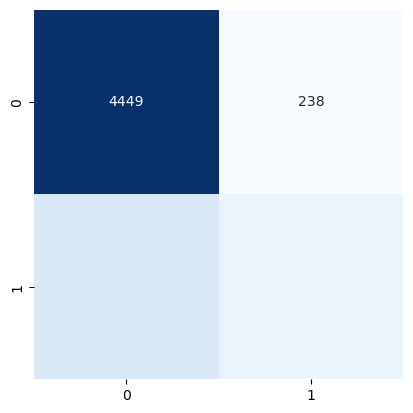

In [147]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print(con_mat)

plt.xlabel("Variables predichas")
plt.ylabel("Verdad terreno")
sns.heatmap(con_mat, annot=True, fmt="d", cmap="Blues", square=True, cbar=False)
plt.show()
plt.show()

In [148]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Convertir las predicciones enteras en etiquetas de cadena
y_pred_labels = np.where(y_pred == 0, 'No', 'Si')

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_labels)

# Mostrar la matriz de confusión
print(f"Matriz de confusión:\n{conf_matrix}")

# Calcular las métricas
exactitud = accuracy_score(y_test, y_pred_labels)
precision = precision_score(y_test, y_pred_labels, pos_label='No')
sensibilidad = recall_score(y_test, y_pred_labels, pos_label='No')
especificidad = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
f1 = f1_score(y_test, y_pred_labels, pos_label='No')

# Mostrar las métricas
print(f"Exactitud: {exactitud:.2f}")
print(f"Precisión: {precision:.2f}")
print(f"Sensibilidad: {sensibilidad:.2f}")
print(f"Especificidad: {especificidad:.2f}")
print(f"F1-Score: {f1:.2f}")

Matriz de confusión:
[[4449  238]
 [ 835  478]]
Exactitud: 0.82
Precisión: 0.84
Sensibilidad: 0.95
Especificidad: 0.95
F1-Score: 0.89


[[4449  238]
 [ 835  478]]


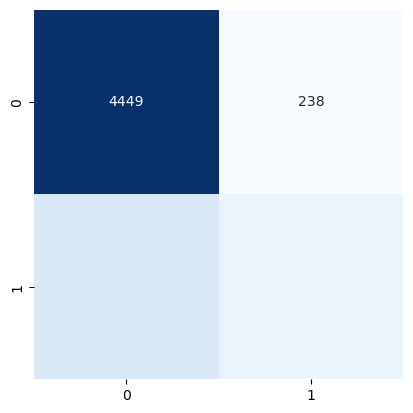

In [149]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print(con_mat)

plt.xlabel("Variables predichas")
plt.ylabel("Verdad terreno")
sns.heatmap(con_mat, annot=True, fmt="d", cmap="Blues", square=True, cbar=False)
plt.show()
plt.show()

In [150]:
#Evaluación de modelo
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_labels))


              precision    recall  f1-score   support

          No       0.84      0.95      0.89      4687
          Si       0.67      0.36      0.47      1313

    accuracy                           0.82      6000
   macro avg       0.75      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000



In [151]:
import pickle

# Suponiendo que 'modelo_rf' ya está definido y entrenado previamente

# Guardar modelo en el disco
filename = 'Proyecto2_examen_MireyaT.sav'
with open(filename, 'wb') as file:
    pickle.dump(modelo_rf, file)

# Cargar modelo del disco
loaded_model = None
with open(filename, 'rb') as file:
    loaded_model = pickle.load(file)